In [1]:
import pandas as pd
from sklearn import tree
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\fores\\Downloads\\train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from IPython.display import SVG
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [7]:
X = pd.get_dummies(X)

In [8]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [9]:
np.random.seed(0)

In [10]:
X = X.fillna({'Age' : X.Age.median()})

In [11]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)

In [12]:
y = df.Survived

In [13]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [14]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(2431.607516263941, 1325.025, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(898.4526022304833, 1257.075, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(352.639405204461, 1189.125, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(269.6654275092937, 1121.175, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(228.17843866171006, 1053.225, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(186.6914498141264, 985.275, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(269.6654275092937, 985.275, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(165.94795539033458, 917.325, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(82.97397769516729, 849.375, 'Fare <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(41.486988847583646, 781.425, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(124.46096654275094,

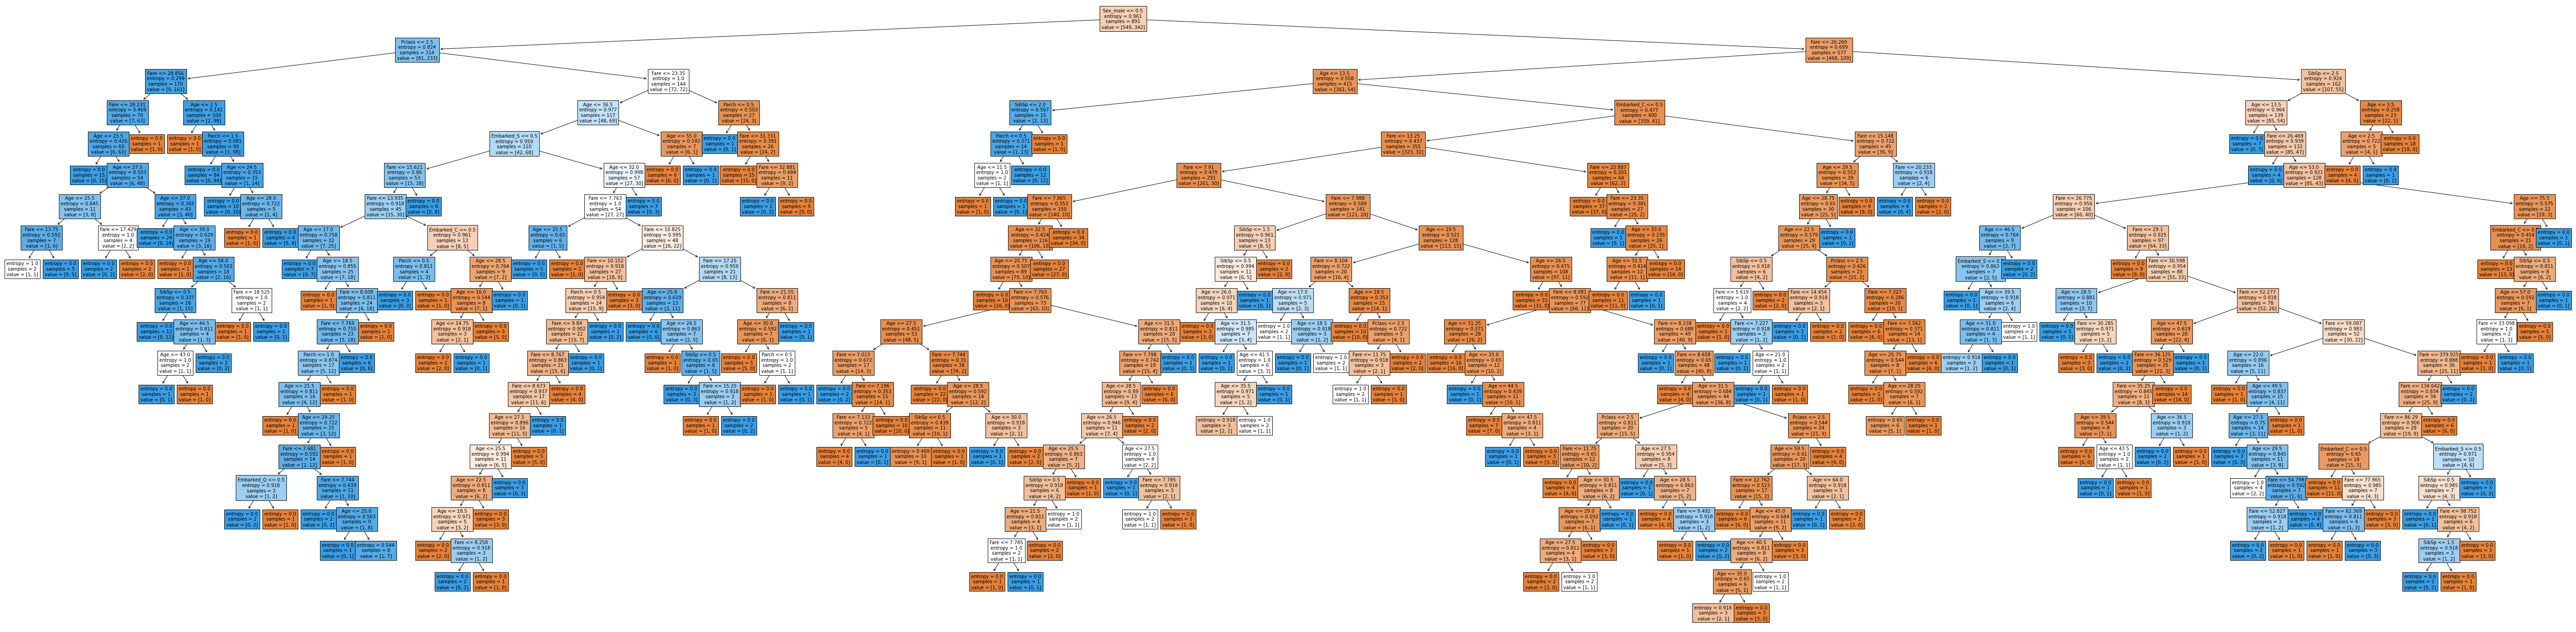

In [15]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.shape

(596, 10)

In [18]:
clf.score(X,y)

0.9797979797979798

In [19]:
clf.score(X_train, y_train)

0.9714765100671141

In [20]:
clf.score(X_test, y_test)

0.9966101694915255

In [21]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
clf.score(X_train, y_train)

0.8238255033557047

In [24]:
clf.score(X_test, y_test)

0.8203389830508474

In [25]:
max_depth_values = range(1, 100)

In [26]:
scores_data = pd.DataFrame()

In [27]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth )
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [28]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.793669


In [29]:
scores_data_long = scores_data.melt(id_vars=['max_depth'],
                                    value_vars=['train_score', 'test_score', 'cross_val_score'],
                                    var_name='set_type',
                                    value_name = 'score')

df.melt(id_vars=['A'], value_vars=['B'],
        var_name='myVarname', value_name='myValname')

In [30]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.765154
293,96,cross_val_score,0.768515
294,97,cross_val_score,0.766807
295,98,cross_val_score,0.770182


In [36]:
sns.__version__

'0.10.1'

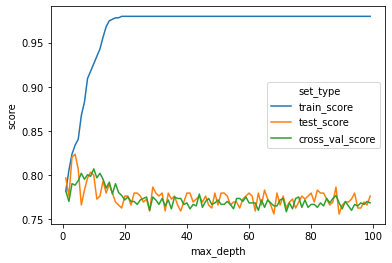

In [31]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [32]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [33]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7886274509803922

In [34]:
best_clf = clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [35]:
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.7898305084745763

In [48]:
from sklearn.metrics import precision_score, recall_score

In [37]:
best_clf.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [57]:
N = int(input())
A=[]
for i in range(N):
    A.append(int(input()))
S = 0
for i in range(N):
    S += A[i]
print(S)

3
2
1
1
4


In [60]:
import pandas as pd
N = int(input())
A=[]
for i in range(N):
    A.append(int(input()))
A = pd.Series(A)
A.sum()

3
1
1
1


3

In [59]:
A

0    3
1    2
dtype: int64

In [85]:
df = pd.read_csv('C:\\Users\\fores\\Downloads\\train_iris.csv')

In [88]:
df

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [90]:
X = df.drop(['Unnamed: 0', 'species'], axis = 1)

In [91]:
y = df.species

In [102]:
np.random.seed(0)

In [103]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [104]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [106]:
max_depth_values = range(1, 100)

In [119]:
scores_data = pd.DataFrame()

In [120]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth )
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    accuracy_score = clf.score(X_testt, y_testt)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score],
                                    'accuracy_score' : [accuracy_score]})
    scores_data = scores_data.append(temp_score_data)

In [121]:
scores_data

,max_depth,train_score,test_score,cross_val_score,accuracy_score
0,1,0.716418,0.666667,0.716484,0.60
0,2,1.000000,0.909091,1.000000,0.92
0,3,1.000000,0.909091,1.000000,0.92
0,4,1.000000,0.909091,1.000000,0.92
0,5,1.000000,0.909091,1.000000,0.92
...,...,...,...,...,...
0,95,1.000000,0.909091,1.000000,0.92
0,96,1.000000,0.909091,1.000000,0.92
0,97,1.000000,0.909091,1.000000,0.92
0,98,1.000000,0.909091,1.000000,0.92


In [110]:
test_iris = pd.read_csv('C:\\Users\\fores\\Downloads\\test_iris.csv')

In [112]:
test_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [114]:
X_testt = test_iris.drop(['Unnamed: 0', 'species'], axis = 1)

In [115]:
y_testt = test_iris.species

In [116]:
clf.score(X_testt, y_testt )

0.92

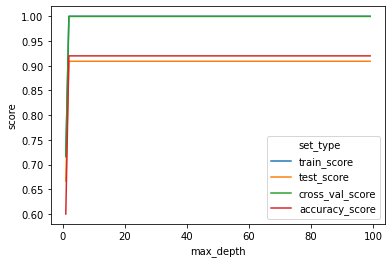

In [124]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long[[]])

In [2]:
df = pd.read_csv('C:\\Users\\fores\\Downloads\\dogs_n_cats.csv')

In [3]:
df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [13]:
X = aa.drop(['Вид'], axis = 1)

In [11]:
aa = pd.get_dummies(df).drop('Вид_котик', axis = 1).rename(columns={'Вид_собачка' : 'Вид'})

In [15]:
y = aa[['Вид']]

In [22]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [25]:
ass = clf.fit(X, y)

In [29]:
clf.score(X,y)

1.0

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
list(clf.predict(X)).count(0)

500

In [33]:
aa

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1
...,...,...,...,...,...,...
995,8,3.2,1,0,1,0
996,7,2.8,1,0,1,0
997,6,2.4,1,0,1,0
998,7,2.8,1,0,1,0


In [36]:
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [47]:
qq = pd.read_json('C:\\Users\\fores\\Downloads\\dataset_209691_15.txt')

In [51]:
qq

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,33,39.6,1,1,0
1,34,40.8,1,1,0
2,18,21.6,1,1,0
3,23,27.6,1,1,0
4,31,37.2,1,1,0
...,...,...,...,...,...
95,7,2.8,1,0,1
96,14,5.6,1,0,1
97,6,2.4,1,0,1
98,14,5.6,1,0,1


In [53]:
clf.predict(qq).sum()

42

In [38]:
clf = tree.DecisionTreeClassifier()

In [39]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30)}

In [40]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [41]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [42]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [43]:
best_clf = grid_search_cv_clf.best_estimator_

In [44]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [46]:
y_pred = best_clf.predict(X_test)

In [47]:
precision_score(y_test, y_pred)

0.7889908256880734

In [49]:
recall_score(y_test, y_pred)

0.7166666666666667

In [63]:
y_predicted_prob = best_clf.predict_proba(X_test)

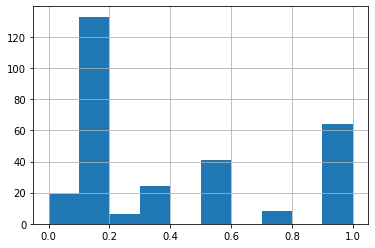

In [66]:
pd.Series(y_predicted_prob[:,1]).hist()

In [92]:
new_predicted = np.where(y_predicted_prob[:,1] > 0.3, 1, 0)

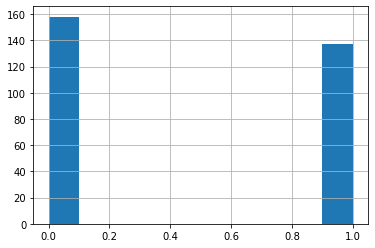

In [93]:
pd.Series(new_predicted).hist()

In [94]:
precision_score(y_test, new_predicted)

0.7372262773722628

In [95]:
recall_score(y_test,new_predicted)

0.8416666666666667

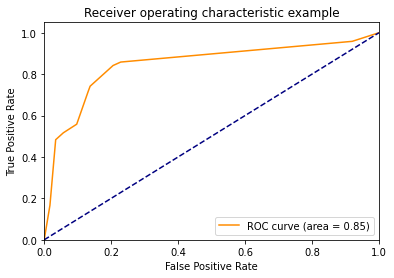

In [87]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()